In [28]:
# Define the target column
target_col = 'Target'

# Step 1: EDA and Data Cleaning

## Yango Accra Mobility Prediction Hackathon

**Objective**: Explore and understand the trip and weather data to identify patterns and prepare for feature engineering.

**Key Goals**:
- Load and examine all datasets
- Understand data quality and missing values
- Explore relationships between features and target variable
- Identify patterns in time, weather, and location data
- Clean and prepare data for modeling

In [29]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load and Examine Datasets

In [30]:
# Load all datasets
train_df = pd.read_csv('../data/Train.csv')
test_df = pd.read_csv('../data/Test.csv')
weather_df = pd.read_csv('../data/Accra_weather.csv')
sample_submission = pd.read_csv('../data/SampleSubmission.csv')
variable_definitions = pd.read_csv('../data/VariableDefinitions.csv')

print("All datasets loaded successfully!")
print(f"\n Dataset shapes:")
print(f"Train: {train_df.shape}")
print(f"Test: {test_df.shape}")
print(f"Weather: {weather_df.shape}")
print(f"Sample Submission: {sample_submission.shape}")

All datasets loaded successfully!

 Dataset shapes:
Train: (57596, 10)
Test: (24684, 9)
Weather: (744, 5)
Sample Submission: (24684, 2)


In [31]:
# Display variable definitions
print("Variable Definitions:")
print("=" * 50)
for _, row in variable_definitions.iterrows():
    print(f"{row['Attribute']}: {row['Description']}")

Variable Definitions:
trip_id: Unique identifier for the trip
lcl_start_transporting_dt: Local date when the trip started
lcl_start_transporting_dttm: Local date and time when the trip started
lcl_order_finished_dttm: Local date and time when the trip ended
transporting_time_fact_mnt: Actual travel time in minutes
transporting_distance_fact_km: Actual travel distance in kilometers
str_distance_km: Straight-line distance in kilometers
origin_lat: Latitude of the starting point
origin_lon: Longitude of the starting point
destination_lat: Latitude of the destination point
destination_lon: Longitude of the destination point
lcl_date: Local date
lcl_datetime: Local date and time
precipitation_type: Type of precipitation
prev_hour_precipitation_mm: Precipitation in millimeters in the past hour
temperature_C: Temperature in degrees Celsius


## Training Data Overview

In [32]:
# Examine training data structure
print("Training Data Overview:")
print("=" * 30)
print(train_df.info())
print("\nFirst few rows:")
display(train_df.head())

Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57596 entries, 0 to 57595
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   trip_id                        57596 non-null  object 
 1   destination_lat                57596 non-null  float64
 2   destination_lon                57596 non-null  float64
 3   lcl_start_transporting_dt      57596 non-null  object 
 4   lcl_start_transporting_dttm    57596 non-null  object 
 5   origin_lat                     57596 non-null  float64
 6   origin_lon                     57596 non-null  float64
 7   str_distance_km                57596 non-null  float64
 8   transporting_distance_fact_km  57596 non-null  float64
 9   Target                         57596 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.4+ MB
None

First few rows:


,trip_id,destination_lat,destination_lon,lcl_start_transporting_dt,lcl_start_transporting_dttm,origin_lat,origin_lon,str_distance_km,transporting_distance_fact_km,Target
0,ID_S3BD1V9G53,5.630927,-0.169211,2024-05-05,2024-05-05 09:56:32,5.630979,-0.164760,0.529,0.850,2.18
1,ID_ZJM7LMN65Q,5.645044,-0.156482,2024-05-21,2024-05-21 10:53:32,5.686892,-0.118931,6.230,8.720,20.93
2,ID_SZ3BP6V01V,5.711156,-0.141063,2024-05-05,2024-05-05 21:21:21,5.706008,-0.164999,2.705,3.239,13.02
3,ID_5IPHXDCMKF,5.677497,-0.183350,2024-05-26,2024-05-26 21:23:33,5.665943,-0.182602,1.236,1.410,3.80
4,ID_BYZEJ0B5RA,5.601700,-0.173589,2024-05-30,2024-05-30 14:02:13,5.565401,-0.160919,4.312,6.553,17.23


In [33]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 30)
missing_data = train_df.isnull().sum()
missing_percent = (missing_data / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)
print(missing_df)

Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


In [34]:
# Basic statistics for numerical columns
print("Numerical Features Statistics:")
print("=" * 35)
display(train_df.describe())

Numerical Features Statistics:


,destination_lat,destination_lon,origin_lat,origin_lon,str_distance_km,transporting_distance_fact_km,Target
count,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000
mean,5.644267,-0.169131,5.644717,-0.169566,1.856562,3.170373,10.084202
std,0.044116,0.041993,0.043378,0.041983,1.564909,2.855521,8.902421
min,5.526851,-0.354872,5.527981,-0.349419,0.000000,0.501000,1.020000
25%,5.622134,-0.187408,5.622675,-0.186448,0.934000,1.599000,5.270000
50%,5.656059,-0.167765,5.657558,-0.167834,1.447000,2.379000,7.710000
75%,5.675784,-0.149920,5.675472,-0.150483,2.245000,3.742000,12.030000
max,5.754841,-0.047629,5.752558,-0.048585,18.120000,90.428000,585.930000


## Target Variable Analysis

In [35]:
# Analyze target variable: Target
target_col = 'Target'

print(f"Target Variable: {target_col}")
print("=" * 40)
print(f"Mean: {train_df[target_col].mean():.2f} minutes")
print(f"Median: {train_df[target_col].median():.2f} minutes")
print(f"Std: {train_df[target_col].std():.2f} minutes")
print(f"Min: {train_df[target_col].min():.2f} minutes")
print(f"Max: {train_df[target_col].max():.2f} minutes")
print(f"Skewness: {train_df[target_col].skew():.2f}")
print(f"Kurtosis: {train_df[target_col].kurtosis():.2f}")

Target Variable: Target
Mean: 10.08 minutes
Median: 7.71 minutes
Std: 8.90 minutes
Min: 1.02 minutes
Max: 585.93 minutes
Skewness: 10.33
Kurtosis: 419.85


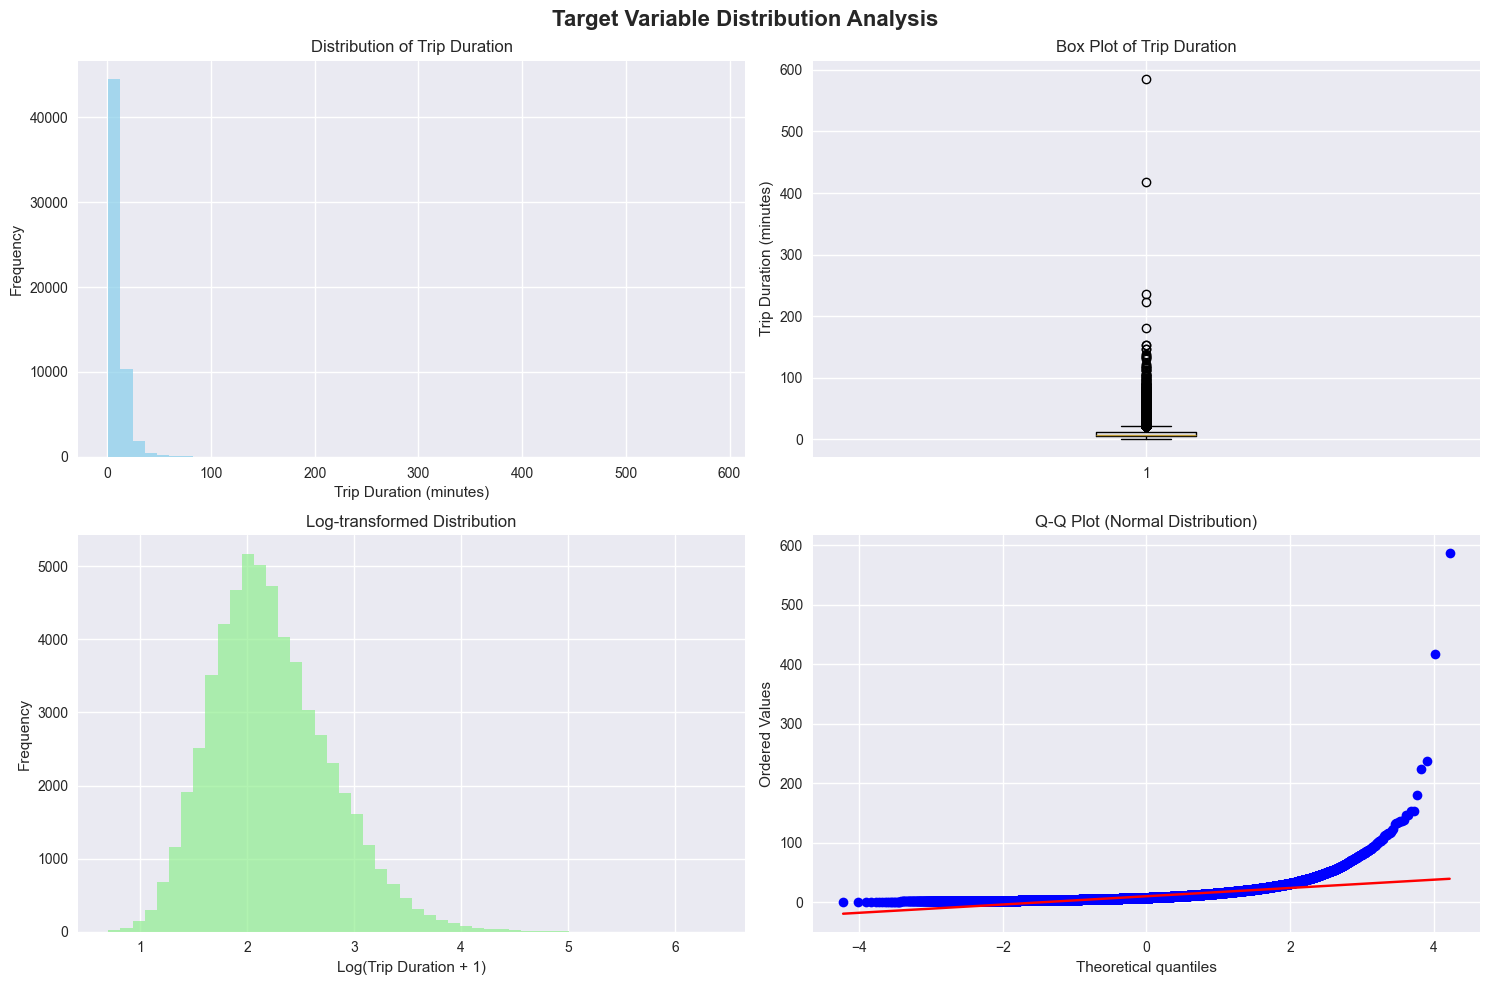


Outliers Analysis:
Number of outliers: 3605 (6.26%)
Lower bound: -4.87 minutes
Upper bound: 22.17 minutes


In [36]:
# Visualize target distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Target Variable Distribution Analysis', fontsize=16, fontweight='bold')

# Histogram
axes[0, 0].hist(train_df[target_col], bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Trip Duration')
axes[0, 0].set_xlabel('Trip Duration (minutes)')
axes[0, 0].set_ylabel('Frequency')

# Box plot
axes[0, 1].boxplot(train_df[target_col])
axes[0, 1].set_title('Box Plot of Trip Duration')
axes[0, 1].set_ylabel('Trip Duration (minutes)')

# Log-scale histogram
axes[1, 0].hist(np.log1p(train_df[target_col]), bins=50, alpha=0.7, color='lightgreen')
axes[1, 0].set_title('Log-transformed Distribution')
axes[1, 0].set_xlabel('Log(Trip Duration + 1)')
axes[1, 0].set_ylabel('Frequency')

# Q-Q plot
from scipy import stats
stats.probplot(train_df[target_col], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normal Distribution)')

plt.tight_layout()
plt.show()

# Check for outliers
Q1 = train_df[target_col].quantile(0.25)
Q3 = train_df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_df[(train_df[target_col] < lower_bound) | (train_df[target_col] > upper_bound)]
print(f"\nOutliers Analysis:")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")
print(f"Lower bound: {lower_bound:.2f} minutes")
print(f"Upper bound: {upper_bound:.2f} minutes")

## Geographic Data Analysis

In [37]:
# Analyze geographic coordinates
print("Geographic Data Analysis:")
print("=" * 30)
print("Origin coordinates:")
print(f"Latitude range: {train_df['origin_lat'].min():.6f} to {train_df['origin_lat'].max():.6f}")
print(f"Longitude range: {train_df['origin_lon'].min():.6f} to {train_df['origin_lon'].max():.6f}")
print("\nDestination coordinates:")
print(f"Latitude range: {train_df['destination_lat'].min():.6f} to {train_df['destination_lat'].max():.6f}")
print(f"Longitude range: {train_df['destination_lon'].min():.6f} to {train_df['destination_lon'].max():.6f}")

# Check for missing coordinates
coord_cols = ['origin_lat', 'origin_lon', 'destination_lat', 'destination_lon']
print("\nMissing coordinates:")
for col in coord_cols:
    missing = train_df[col].isnull().sum()
    print(f"{col}: {missing} missing values")

Geographic Data Analysis:
Origin coordinates:
Latitude range: 5.527981 to 5.752558
Longitude range: -0.349419 to -0.048585

Destination coordinates:
Latitude range: 5.526851 to 5.754841
Longitude range: -0.354872 to -0.047629

Missing coordinates:
origin_lat: 0 missing values
origin_lon: 0 missing values
destination_lat: 0 missing values
destination_lon: 0 missing values


In [38]:
# Visualize trip locations on a map
# Sample data for visualization (to avoid overcrowding)
sample_size = min(1000, len(train_df))
sample_df = train_df.sample(n=sample_size, random_state=42)

fig = go.Figure()

# Add origin points
fig.add_trace(go.Scattermapbox(
    lat=sample_df['origin_lat'],
    lon=sample_df['origin_lon'],
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.6),
    name='Origin Points',
    text=sample_df['trip_id']
))

# Add destination points
fig.add_trace(go.Scattermapbox(
    lat=sample_df['destination_lat'],
    lon=sample_df['destination_lon'],
    mode='markers',
    marker=dict(size=4, color='red', opacity=0.6),
    name='Destination Points',
    text=sample_df['trip_id']
))

fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=sample_df['origin_lat'].mean(), lon=sample_df['origin_lon'].mean()),
        zoom=10
    ),
    title="Trip Origins and Destinations in Accra",
    height=600
)

fig.show()

## Time-based Analysis

In [39]:
# Convert datetime columns
datetime_cols = ['lcl_start_transporting_dttm']  # Removed 'lcl_order_finished_dttm' as it does not exist
for col in datetime_cols:
    train_df[col] = pd.to_datetime(train_df[col])

train_df['lcl_start_transporting_dt'] = pd.to_datetime(train_df['lcl_start_transporting_dt'])

# Extract time features
train_df['hour'] = train_df['lcl_start_transporting_dttm'].dt.hour
train_df['day_of_week'] = train_df['lcl_start_transporting_dttm'].dt.dayofweek
train_df['day_of_month'] = train_df['lcl_start_transporting_dttm'].dt.day
train_df['is_weekend'] = (train_df['day_of_week'] >= 5).astype(int)

# Define rush hours (typical commute times)
def get_rush_hour(hour):
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return 1
    return 0

train_df['is_rush_hour'] = train_df['hour'].apply(get_rush_hour)

print("Time features created successfully!")
print(f"Date range: {train_df['lcl_start_transporting_dt'].min()} to {train_df['lcl_start_transporting_dt'].max()}")

Time features created successfully!
Date range: 2024-05-01 00:00:00 to 2024-06-01 00:00:00


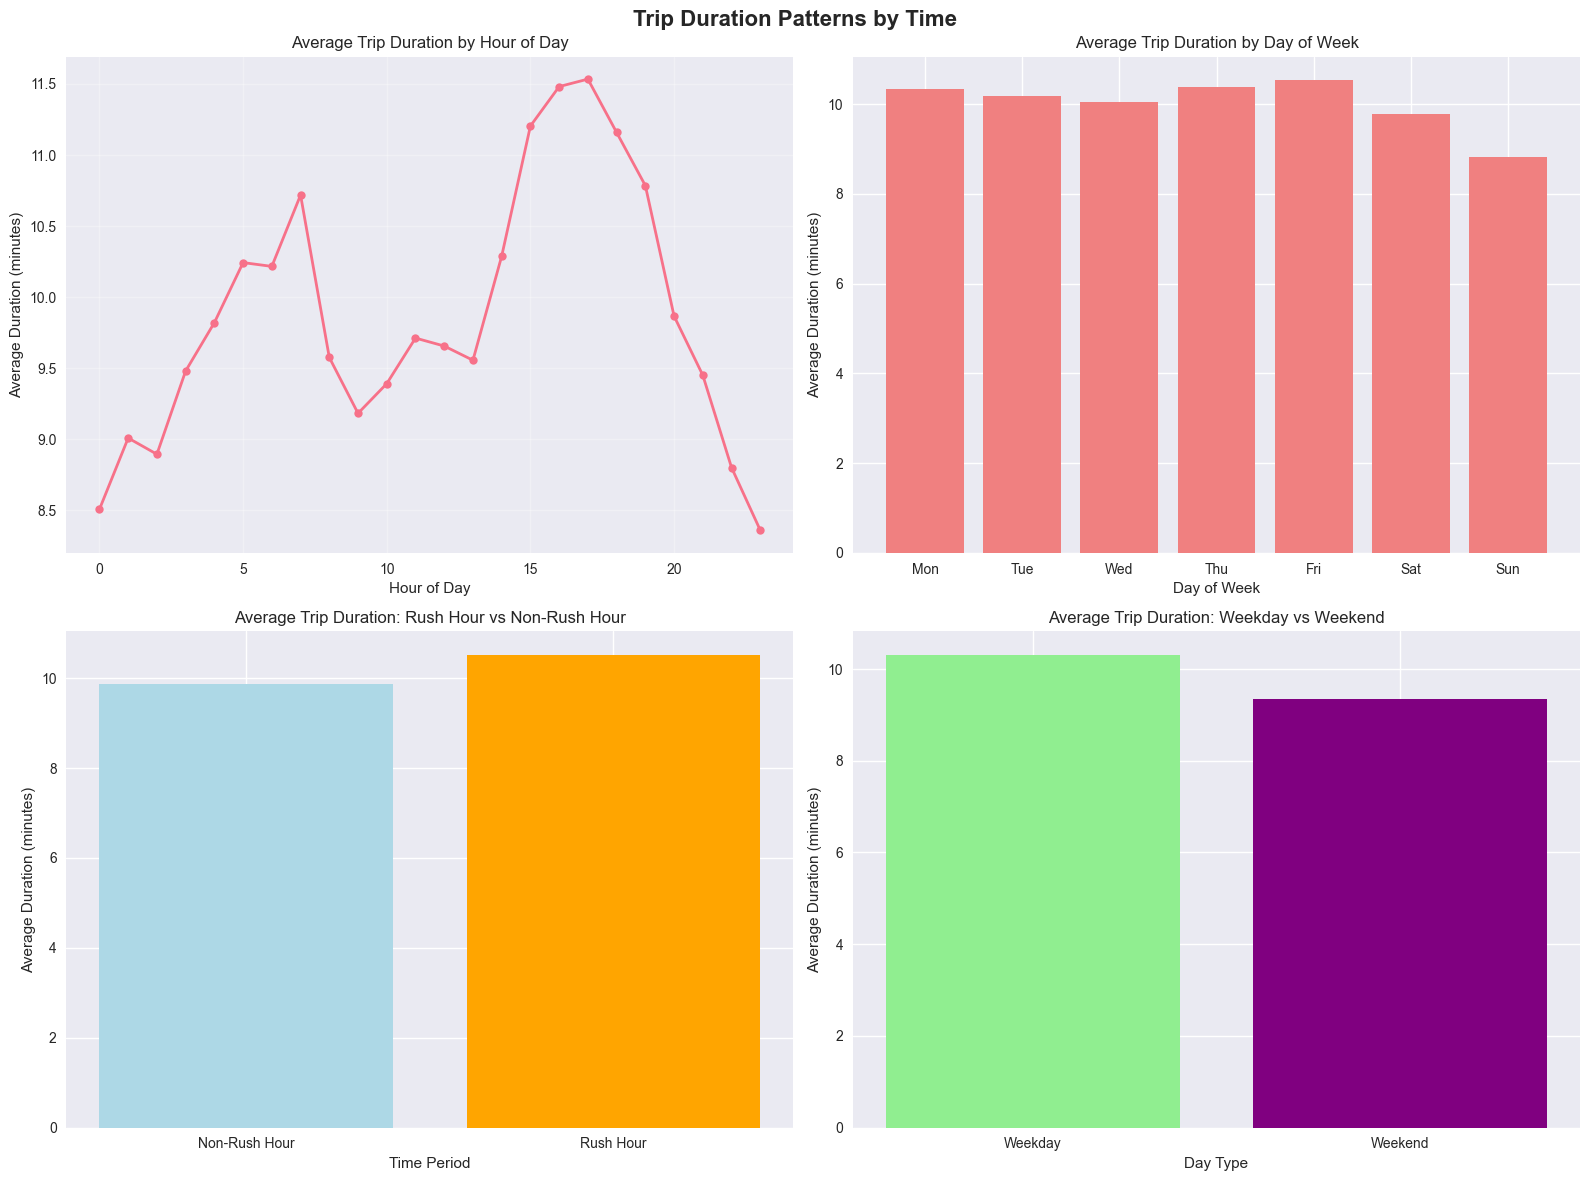


Time-based Duration Statistics:
Rush hour avg: 10.51 minutes
Non-rush hour avg: 9.88 minutes
Weekend avg: 9.36 minutes
Weekday avg: 10.30 minutes


In [40]:
# Analyze trip duration patterns by time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Trip Duration Patterns by Time', fontsize=16, fontweight='bold')

# By hour of day
hourly_duration = train_df.groupby('hour')[target_col].agg(['mean', 'count']).reset_index()
axes[0, 0].plot(hourly_duration['hour'], hourly_duration['mean'], marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('Average Trip Duration by Hour of Day')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Average Duration (minutes)')
axes[0, 0].grid(True, alpha=0.3)

# By day of week
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekly_duration = train_df.groupby('day_of_week')[target_col].agg(['mean', 'count']).reset_index()
axes[0, 1].bar(weekly_duration['day_of_week'], weekly_duration['mean'], color='lightcoral')
axes[0, 1].set_title('Average Trip Duration by Day of Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Average Duration (minutes)')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(day_names)

# Rush hour vs non-rush hour
rush_hour_duration = train_df.groupby('is_rush_hour')[target_col].agg(['mean', 'count']).reset_index()
rush_labels = ['Non-Rush Hour', 'Rush Hour']
axes[1, 0].bar(rush_hour_duration['is_rush_hour'], rush_hour_duration['mean'], color=['lightblue', 'orange'])
axes[1, 0].set_title('Average Trip Duration: Rush Hour vs Non-Rush Hour')
axes[1, 0].set_xlabel('Time Period')
axes[1, 0].set_ylabel('Average Duration (minutes)')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(rush_labels)

# Weekend vs weekday
weekend_duration = train_df.groupby('is_weekend')[target_col].agg(['mean', 'count']).reset_index()
weekend_labels = ['Weekday', 'Weekend']
axes[1, 1].bar(weekend_duration['is_weekend'], weekend_duration['mean'], color=['lightgreen', 'purple'])
axes[1, 1].set_title('Average Trip Duration: Weekday vs Weekend')
axes[1, 1].set_xlabel('Day Type')
axes[1, 1].set_ylabel('Average Duration (minutes)')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(weekend_labels)

plt.tight_layout()
plt.show()

# Print statistics
print("\nTime-based Duration Statistics:")
print(f"Rush hour avg: {train_df[train_df['is_rush_hour']==1][target_col].mean():.2f} minutes")
print(f"Non-rush hour avg: {train_df[train_df['is_rush_hour']==0][target_col].mean():.2f} minutes")
print(f"Weekend avg: {train_df[train_df['is_weekend']==1][target_col].mean():.2f} minutes")
print(f"Weekday avg: {train_df[train_df['is_weekend']==0][target_col].mean():.2f} minutes")

## Weather Data Analysis

In [41]:
# Examine weather data
print("Weather Data Overview:")
print("=" * 30)
print(weather_df.info())
print("\n First few rows:")
display(weather_df.head())

print("\n Weather statistics:")
display(weather_df.describe())

Weather Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lcl_date                    744 non-null    object 
 1   lcl_datetime                744 non-null    object 
 2   precipitation_type          744 non-null    object 
 3   prev_hour_precipitation_mm  744 non-null    float64
 4   temperature_C               744 non-null    float64
dtypes: float64(2), object(3)
memory usage: 29.2+ KB
None

 First few rows:


,lcl_date,lcl_datetime,precipitation_type,prev_hour_precipitation_mm,temperature_C
0,2024-05-01,2024-05-01 00:00:00,Rain,0.001907,28.54
1,2024-05-01,2024-05-01 01:00:00,Rain,0.002861,28.51
2,2024-05-01,2024-05-01 02:00:00,Rain,0.002861,28.51
3,2024-05-01,2024-05-01 03:00:00,Rain,0.000954,28.53
4,2024-05-01,2024-05-01 04:00:00,Rain,0.001907,28.60



 Weather statistics:


,prev_hour_precipitation_mm,temperature_C
count,744.000000,744.000000
mean,0.151697,28.299825
std,0.466693,0.968711
min,0.000000,25.920000
25%,0.000954,27.650000
50%,0.012398,28.400000
75%,0.076294,29.010000
max,4.338264,30.490000


In [42]:
# Convert weather datetime
weather_df['lcl_datetime'] = pd.to_datetime(weather_df['lcl_datetime'])
weather_df['lcl_date'] = pd.to_datetime(weather_df['lcl_date'])

# Check weather data coverage
print(" Weather Data Coverage:")
print(f"Date range: {weather_df['lcl_date'].min()} to {weather_df['lcl_date'].max()}")
print(f"Total weather records: {len(weather_df)}")
print(f"Unique dates: {weather_df['lcl_date'].nunique()}")
print(f"Records per day: {len(weather_df) / weather_df['lcl_date'].nunique():.1f}")

# Check precipitation types
print("\n Precipitation types:")
print(weather_df['precipitation_type'].value_counts())

# Check missing values in weather data
print("\n Missing values in weather data:")
weather_missing = weather_df.isnull().sum()
print(weather_missing[weather_missing > 0])

 Weather Data Coverage:
Date range: 2024-05-01 00:00:00 to 2024-05-31 00:00:00
Total weather records: 744
Unique dates: 31
Records per day: 24.0

 Precipitation types:
precipitation_type
Rain                682
No precipitation     62
Name: count, dtype: int64

 Missing values in weather data:
Series([], dtype: int64)


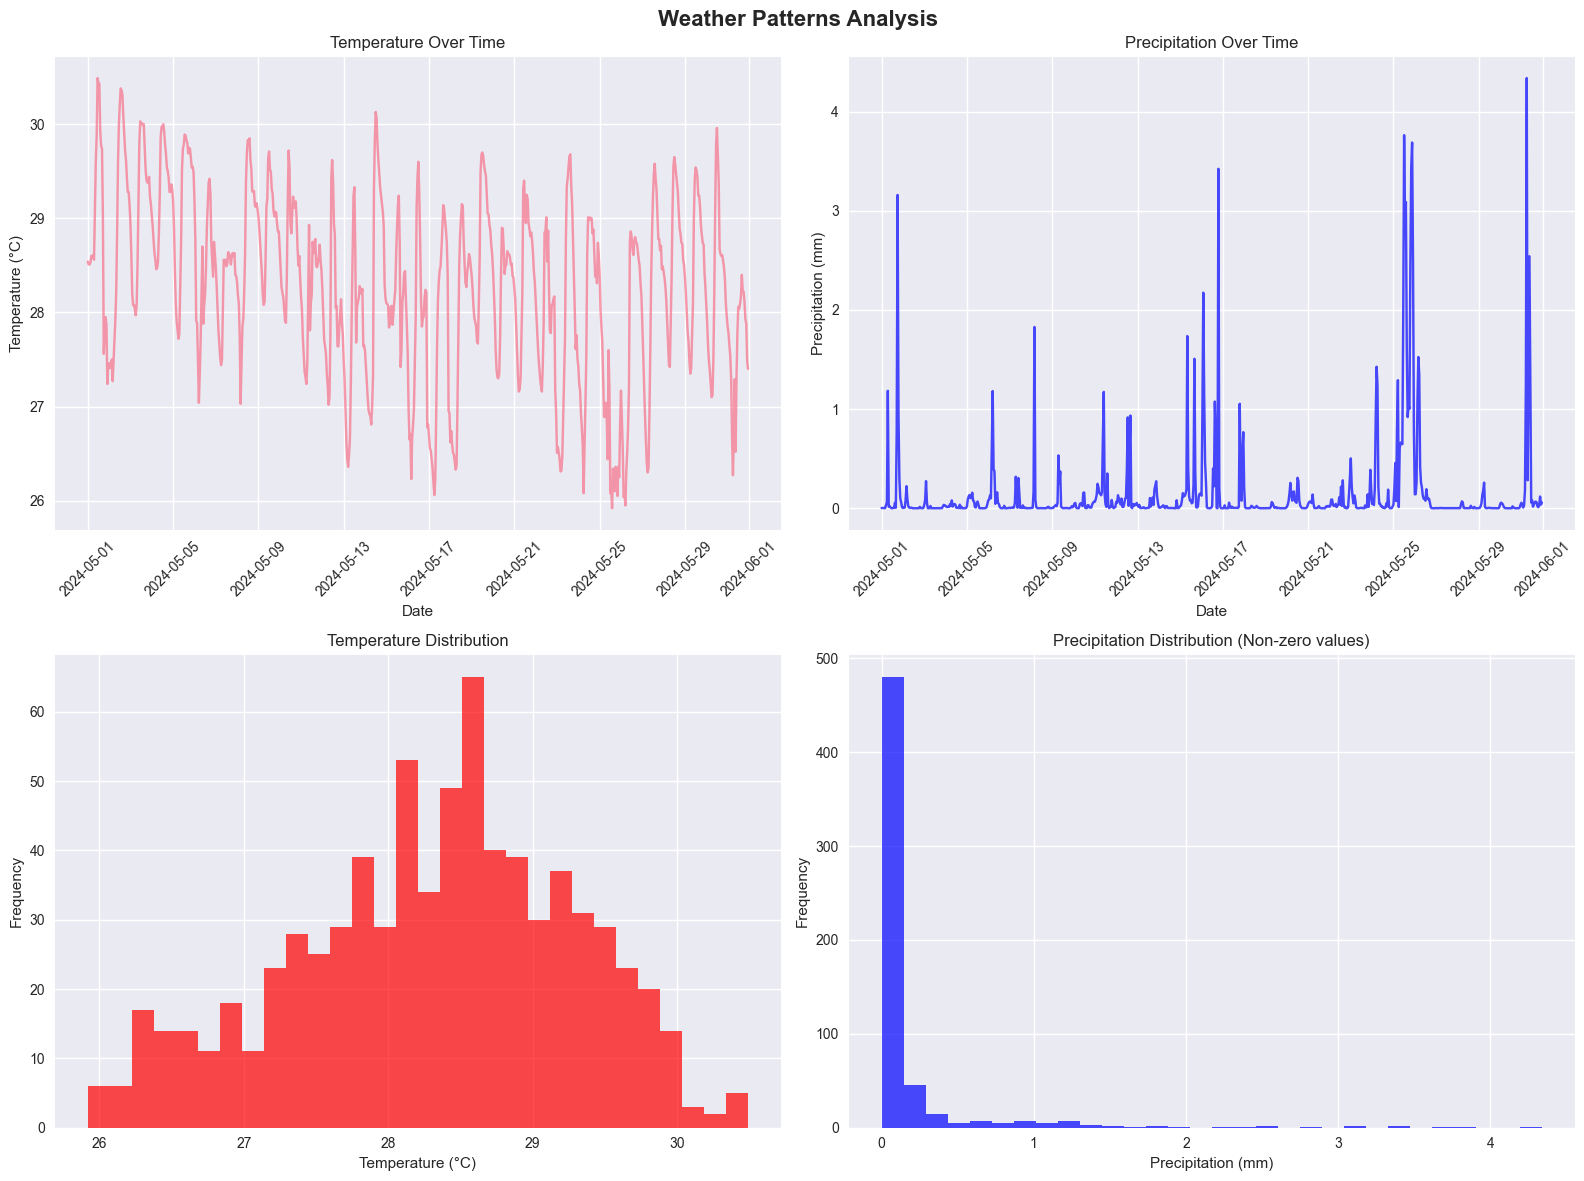


 Temperature: 28.3°C (avg), 1.0°C (std)
 Precipitation: 0.15mm (avg), 0.47mm (std)
 Rainy hours: 598 out of 744 (80.4%)


In [43]:
# Visualize weather patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Weather Patterns Analysis', fontsize=16, fontweight='bold')

# Temperature over time
axes[0, 0].plot(weather_df['lcl_datetime'], weather_df['temperature_C'], alpha=0.7)
axes[0, 0].set_title('Temperature Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Precipitation over time
axes[0, 1].plot(weather_df['lcl_datetime'], weather_df['prev_hour_precipitation_mm'], alpha=0.7, color='blue')
axes[0, 1].set_title('Precipitation Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Precipitation (mm)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Temperature distribution
axes[1, 0].hist(weather_df['temperature_C'], bins=30, alpha=0.7, color='red')
axes[1, 0].set_title('Temperature Distribution')
axes[1, 0].set_xlabel('Temperature (°C)')
axes[1, 0].set_ylabel('Frequency')

# Precipitation distribution (non-zero values)
precip_nonzero = weather_df[weather_df['prev_hour_precipitation_mm'] > 0]['prev_hour_precipitation_mm']
axes[1, 1].hist(precip_nonzero, bins=30, alpha=0.7, color='blue')
axes[1, 1].set_title('Precipitation Distribution (Non-zero values)')
axes[1, 1].set_xlabel('Precipitation (mm)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Weather statistics
print(f"\n Temperature: {weather_df['temperature_C'].mean():.1f}°C (avg), {weather_df['temperature_C'].std():.1f}°C (std)")
print(f" Precipitation: {weather_df['prev_hour_precipitation_mm'].mean():.2f}mm (avg), {weather_df['prev_hour_precipitation_mm'].std():.2f}mm (std)")
print(f" Rainy hours: {(weather_df['prev_hour_precipitation_mm'] > 0).sum()} out of {len(weather_df)} ({(weather_df['prev_hour_precipitation_mm'] > 0).mean()*100:.1f}%)")

## Distance Analysis

In [44]:
# Analyze distance features
print(" Distance Analysis:")
print("=" * 20)

distance_cols = ['transporting_distance_fact_km', 'str_distance_km']
for col in distance_cols:
    if col in train_df.columns:
        print(f"\n{col}:")
        print(f"  Mean: {train_df[col].mean():.2f} km")
        print(f"  Median: {train_df[col].median():.2f} km")
        print(f"  Std: {train_df[col].std():.2f} km")
        print(f"  Min: {train_df[col].min():.2f} km")
        print(f"  Max: {train_df[col].max():.2f} km")
        print(f"  Missing: {train_df[col].isnull().sum()}")

# Calculate distance between origin and destination using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    from math import radians, cos, sin, asin, sqrt
    
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Calculate haversine distance for all rows
train_df['haversine_distance_km'] = train_df.apply(
    lambda row: haversine_distance(
        row['origin_lat'], row['origin_lon'], 
        row['destination_lat'], row['destination_lon']
    ), axis=1
)

print(f"\nCalculated Haversine distance:")
print(f"  Mean: {train_df['haversine_distance_km'].mean():.2f} km")
print(f"  Median: {train_df['haversine_distance_km'].median():.2f} km")
print(f"  Std: {train_df['haversine_distance_km'].std():.2f} km")

 Distance Analysis:

transporting_distance_fact_km:
  Mean: 3.17 km
  Median: 2.38 km
  Std: 2.86 km
  Min: 0.50 km
  Max: 90.43 km
  Missing: 0

str_distance_km:
  Mean: 1.86 km
  Median: 1.45 km
  Std: 1.56 km
  Min: 0.00 km
  Max: 18.12 km
  Missing: 0

Calculated Haversine distance:
  Mean: 1.86 km
  Median: 1.45 km
  Std: 1.56 km


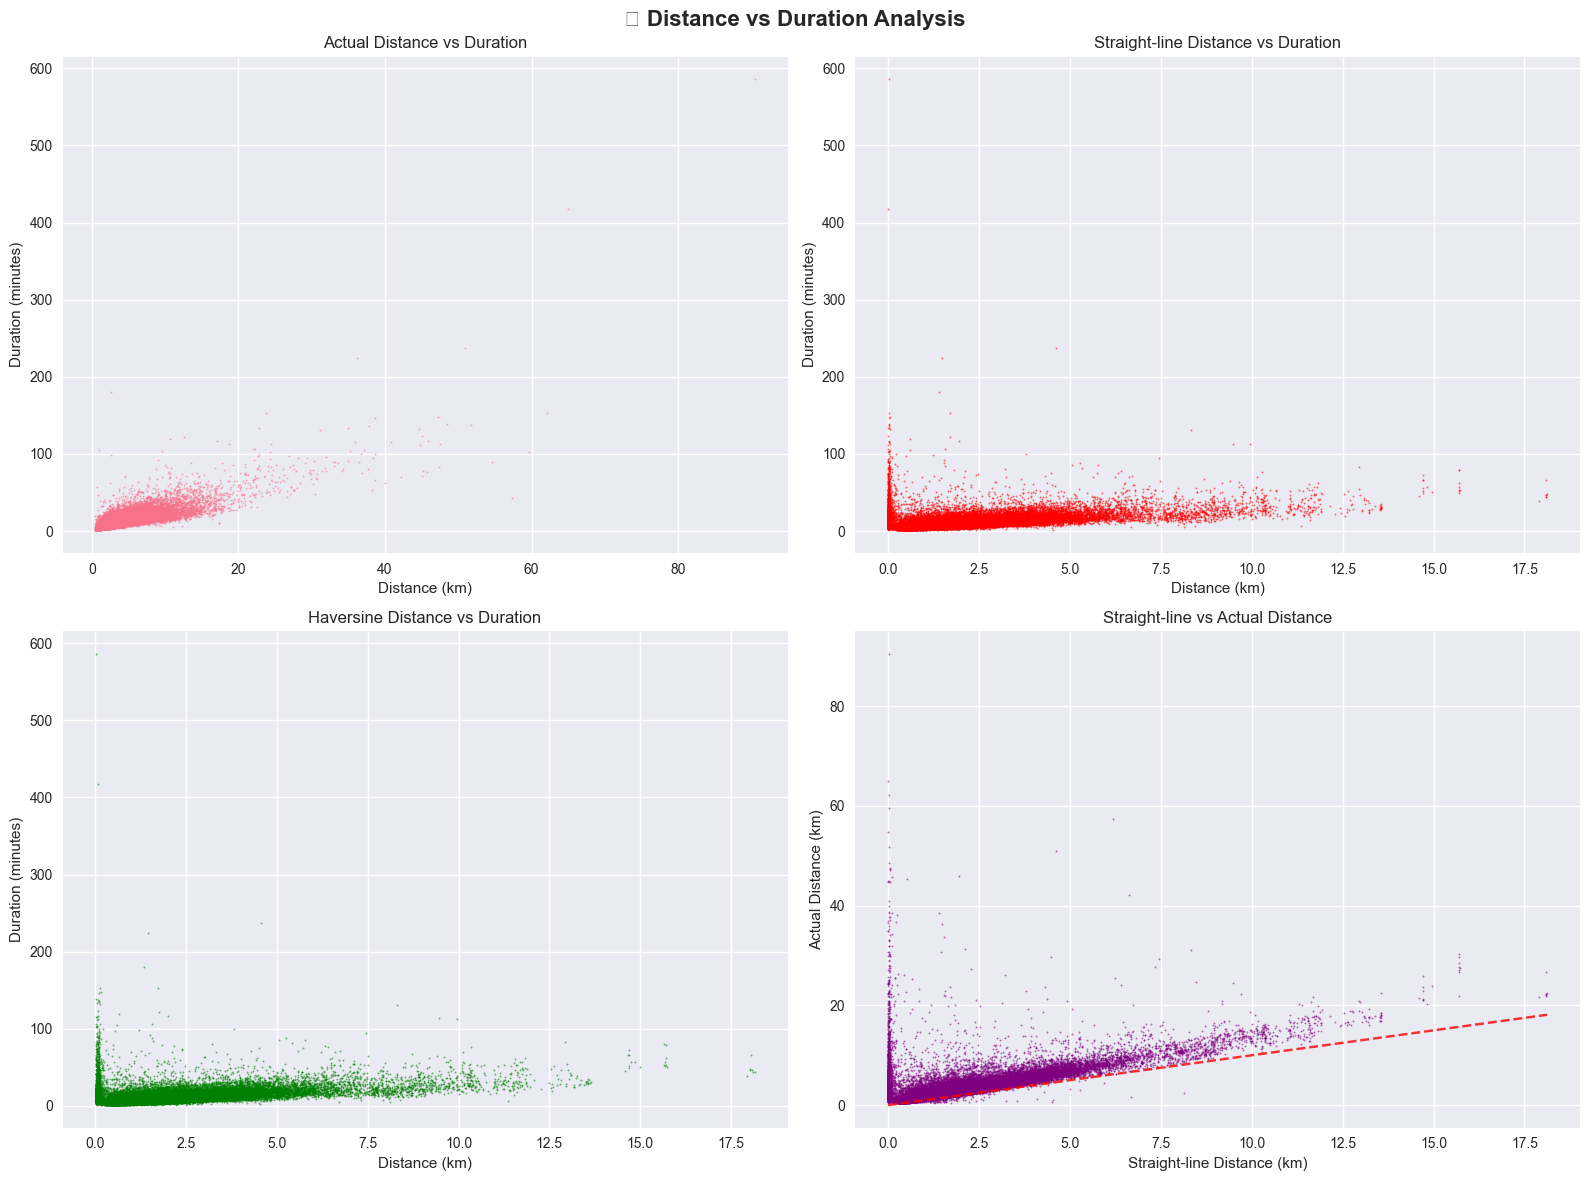


🔗 Distance-Duration Correlations:
haversine_distance_km: 0.4571
transporting_distance_fact_km: 0.8311
str_distance_km: 0.4557


In [45]:
# Visualize distance vs duration relationship
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📏 Distance vs Duration Analysis', fontsize=16, fontweight='bold')

# Scatter plot: Distance vs Duration
if 'transporting_distance_fact_km' in train_df.columns:
    axes[0, 0].scatter(train_df['transporting_distance_fact_km'], train_df[target_col], 
                      alpha=0.5, s=1)
    axes[0, 0].set_title('Actual Distance vs Duration')
    axes[0, 0].set_xlabel('Distance (km)')
    axes[0, 0].set_ylabel('Duration (minutes)')

# Straight-line distance vs Duration
if 'str_distance_km' in train_df.columns:
    axes[0, 1].scatter(train_df['str_distance_km'], train_df[target_col], 
                      alpha=0.5, s=1, color='red')
    axes[0, 1].set_title('Straight-line Distance vs Duration')
    axes[0, 1].set_xlabel('Distance (km)')
    axes[0, 1].set_ylabel('Duration (minutes)')

# Haversine distance vs Duration
axes[1, 0].scatter(train_df['haversine_distance_km'], train_df[target_col], 
                  alpha=0.5, s=1, color='green')
axes[1, 0].set_title('Haversine Distance vs Duration')
axes[1, 0].set_xlabel('Distance (km)')
axes[1, 0].set_ylabel('Duration (minutes)')

# Distance comparison
if 'transporting_distance_fact_km' in train_df.columns and 'str_distance_km' in train_df.columns:
    axes[1, 1].scatter(train_df['str_distance_km'], train_df['transporting_distance_fact_km'], 
                      alpha=0.5, s=1, color='purple')
    axes[1, 1].plot([0, train_df['str_distance_km'].max()], [0, train_df['str_distance_km'].max()], 
                   'r--', alpha=0.8)
    axes[1, 1].set_title('Straight-line vs Actual Distance')
    axes[1, 1].set_xlabel('Straight-line Distance (km)')
    axes[1, 1].set_ylabel('Actual Distance (km)')

plt.tight_layout()
plt.show()

# Calculate correlations
print("\n🔗 Distance-Duration Correlations:")
distance_features = ['haversine_distance_km']
if 'transporting_distance_fact_km' in train_df.columns:
    distance_features.append('transporting_distance_fact_km')
if 'str_distance_km' in train_df.columns:
    distance_features.append('str_distance_km')

for feature in distance_features:
    corr = train_df[feature].corr(train_df[target_col])
    print(f"{feature}: {corr:.4f}")

## Merge Trip and Weather Data

In [46]:
# Merge trip data with weather data
# Round trip datetime to nearest hour to match weather data
train_df['trip_hour'] = train_df['lcl_start_transporting_dttm'].dt.floor('H')
weather_df['weather_hour'] = weather_df['lcl_datetime'].dt.floor('H')

# Merge on rounded hour
train_with_weather = train_df.merge(
    weather_df[['weather_hour', 'precipitation_type', 'prev_hour_precipitation_mm', 'temperature_C']],
    left_on='trip_hour',
    right_on='weather_hour',
    how='left'
)

print(f"Merged Data:")
print(f"Original trips: {len(train_df)}")
print(f"Trips with weather: {len(train_with_weather)}")
print(f"Trips with weather data: {train_with_weather['temperature_C'].notna().sum()}")
print(f"Match rate: {train_with_weather['temperature_C'].notna().mean()*100:.1f}%")

# Show weather data availability
print("\nWeather data availability:")
weather_cols = ['precipitation_type', 'prev_hour_precipitation_mm', 'temperature_C']
for col in weather_cols:
    available = train_with_weather[col].notna().sum()
    print(f"{col}: {available} ({available/len(train_with_weather)*100:.1f}%)")

Merged Data:
Original trips: 57596
Trips with weather: 57596
Trips with weather data: 57589
Match rate: 100.0%

Weather data availability:
precipitation_type: 57589 (100.0%)
prev_hour_precipitation_mm: 57589 (100.0%)
temperature_C: 57589 (100.0%)


## Weather Impact Analysis

In [47]:
# Analyze weather impact on trip duration
weather_data = train_with_weather.dropna(subset=['temperature_C', 'prev_hour_precipitation_mm'])

# Create rain categories
def categorize_rain(precip):
    if precip == 0:
        return 'No Rain'
    elif precip <= 2.5:
        return 'Light Rain'
    elif precip <= 7.5:
        return 'Moderate Rain'
    else:
        return 'Heavy Rain'

weather_data['rain_category'] = weather_data['prev_hour_precipitation_mm'].apply(categorize_rain)

# Create temperature categories
weather_data['temp_category'] = pd.cut(
    weather_data['temperature_C'], 
    bins=4, 
    labels=['Cool', 'Warm', 'Hot', 'Very Hot']
)

print(f"Weather Impact Analysis ({len(weather_data)} trips with weather data):")
print("\nRain category distribution:")
print(weather_data['rain_category'].value_counts())
print("\nTemperature category distribution:")
print(weather_data['temp_category'].value_counts())

Weather Impact Analysis (57589 trips with weather data):

Rain category distribution:
rain_category
Light Rain       43321
No Rain          13438
Moderate Rain      830
Name: count, dtype: int64

Temperature category distribution:
temp_category
Hot         28376
Warm        13058
Very Hot    11653
Cool         4502
Name: count, dtype: int64


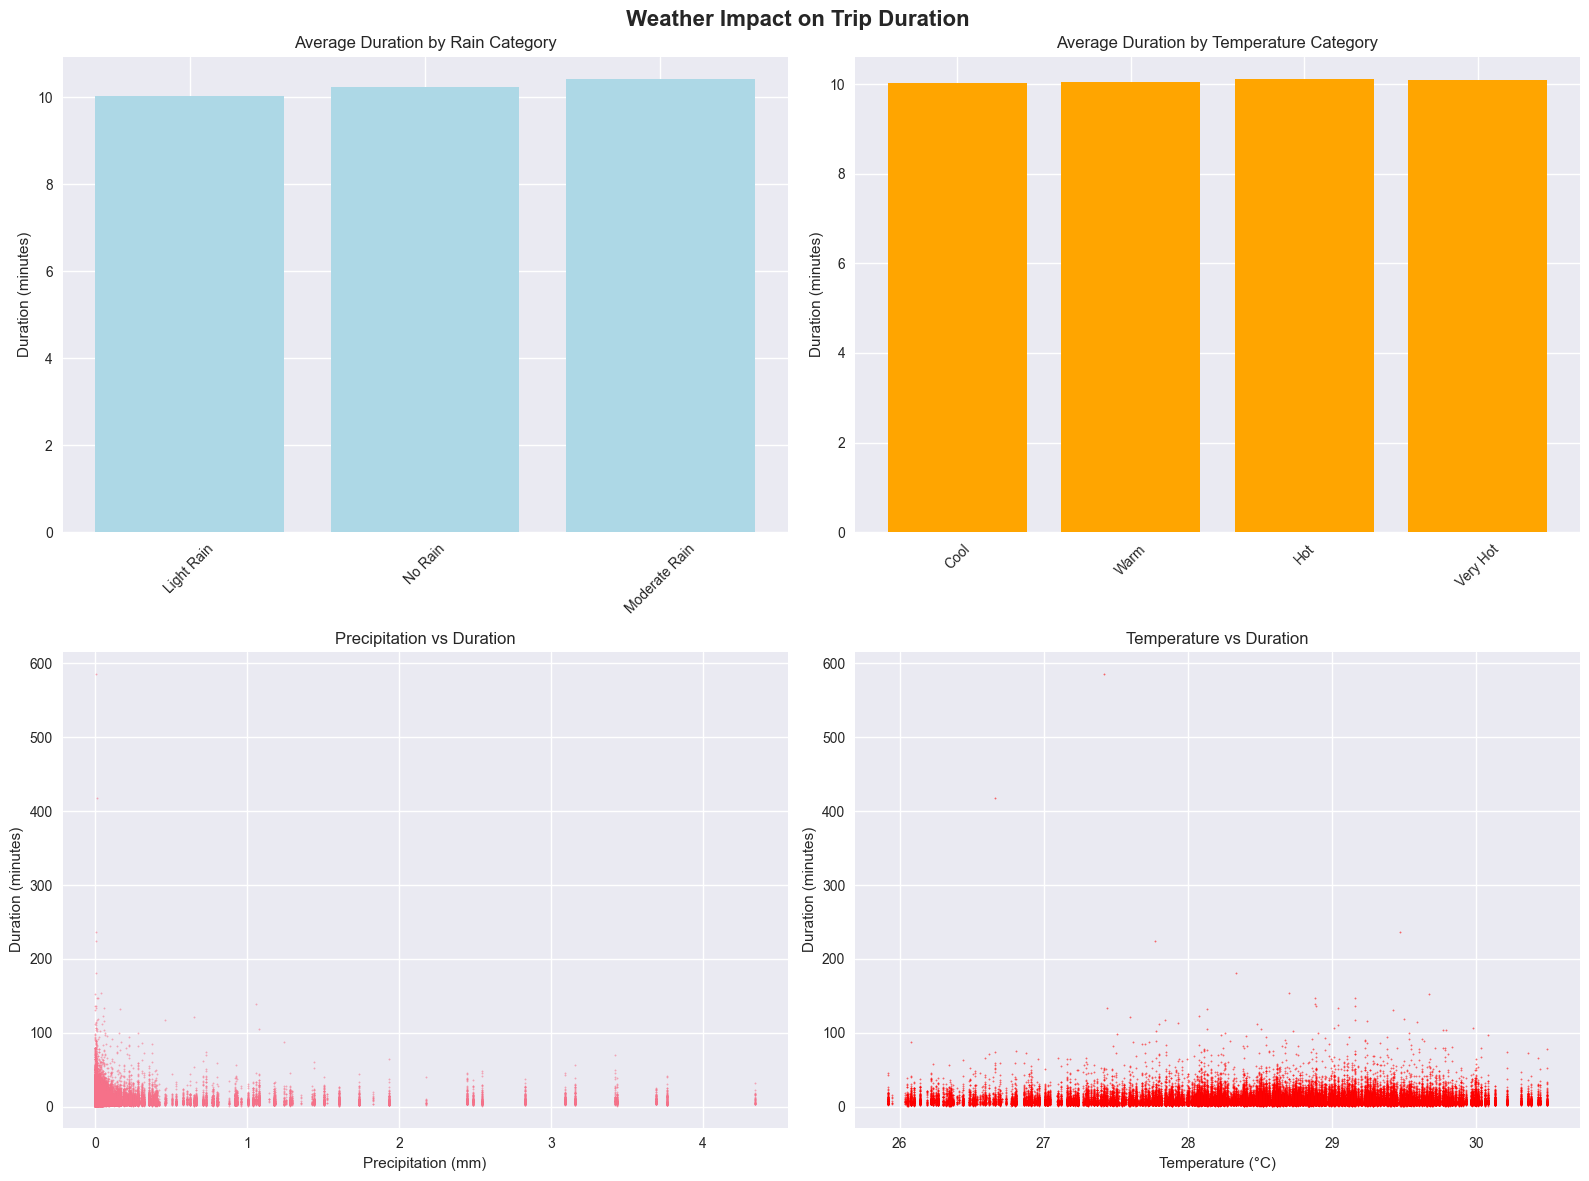


Weather Impact Statistics:
Light Rain: 10.03 min (n=43321)
No Rain: 10.24 min (n=13438)
Moderate Rain: 10.41 min (n=830)

Weather-Duration Correlations:
prev_hour_precipitation_mm: 0.0036
temperature_C: 0.0045


In [48]:
# Visualize weather impact
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Weather Impact on Trip Duration', fontsize=16, fontweight='bold')

# Rain category impact
rain_impact = weather_data.groupby('rain_category')[target_col].agg(['mean', 'count']).reset_index()
rain_impact = rain_impact.sort_values('mean')
axes[0, 0].bar(rain_impact['rain_category'], rain_impact['mean'], color='lightblue')
axes[0, 0].set_title('Average Duration by Rain Category')
axes[0, 0].set_ylabel('Duration (minutes)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Temperature impact
temp_impact = weather_data.groupby('temp_category')[target_col].agg(['mean', 'count']).reset_index()
axes[0, 1].bar(temp_impact['temp_category'], temp_impact['mean'], color='orange')
axes[0, 1].set_title('Average Duration by Temperature Category')
axes[0, 1].set_ylabel('Duration (minutes)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Precipitation vs duration scatter
axes[1, 0].scatter(weather_data['prev_hour_precipitation_mm'], weather_data[target_col], 
                  alpha=0.5, s=1)
axes[1, 0].set_title('Precipitation vs Duration')
axes[1, 0].set_xlabel('Precipitation (mm)')
axes[1, 0].set_ylabel('Duration (minutes)')

# Temperature vs duration scatter
axes[1, 1].scatter(weather_data['temperature_C'], weather_data[target_col], 
                  alpha=0.5, s=1, color='red')
axes[1, 1].set_title('Temperature vs Duration')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

# Print statistics
print("\nWeather Impact Statistics:")
for category in weather_data['rain_category'].unique():
    subset = weather_data[weather_data['rain_category'] == category]
    avg_duration = subset[target_col].mean()
    count = len(subset)
    print(f"{category}: {avg_duration:.2f} min (n={count})")

# Weather correlations
print("\nWeather-Duration Correlations:")
weather_features = ['prev_hour_precipitation_mm', 'temperature_C']
for feature in weather_features:
    corr = weather_data[feature].corr(weather_data[target_col])
    print(f"{feature}: {corr:.4f}")

## Data Cleaning Summary

In [49]:
# Summary of data cleaning steps needed
print("Data Cleaning Summary:")
print("=" * 30)
print("\nCompleted:")
print("- Loaded all datasets successfully")
print("- Analyzed data quality and missing values")
print("- Created time-based features (hour, day_of_week, is_weekend, is_rush_hour)")
print("- Calculated haversine distance between origin and destination")
print("- Merged trip data with weather data")
print("- Analyzed weather impact on trip duration")

print("\nNext Steps for Feature Engineering:")
print("- Handle missing values in weather data")
print("- Create categorical encodings for precipitation type")
print("- Normalize/scale numerical features")
print("- Create location-based features (pickup/dropoff areas)")
print("- Engineer interaction features (weather × time, distance × time)")
print("- Handle outliers in target variable")

print("\nKey Insights:")
print(f"- Average trip duration: {train_df[target_col].mean():.2f} minutes")
print(f"- Rush hour effect: {'Higher' if train_df[train_df['is_rush_hour']==1][target_col].mean() > train_df[train_df['is_rush_hour']==0][target_col].mean() else 'Lower'} duration")
print(f"- Weather data coverage: {train_with_weather['temperature_C'].notna().mean()*100:.1f}%")
print(f"- Distance-duration correlation: {train_df['haversine_distance_km'].corr(train_df[target_col]):.4f}")

# Define the target column
if 'Target' in train_df.columns:
    target_col = 'Target'
else:
    raise ValueError("Target column 'Target' not found in training data.")

# Save cleaned data for next steps
print("\nSaving cleaned data...")
train_with_weather.to_csv('../data/raw/train_with_weather.csv', index=False)
print("Data saved to 'train_with_weather.csv'")

print("\nReady for Feature Engineering Phase!")

Data Cleaning Summary:

Completed:
- Loaded all datasets successfully
- Analyzed data quality and missing values
- Created time-based features (hour, day_of_week, is_weekend, is_rush_hour)
- Calculated haversine distance between origin and destination
- Merged trip data with weather data
- Analyzed weather impact on trip duration

Next Steps for Feature Engineering:
- Handle missing values in weather data
- Create categorical encodings for precipitation type
- Normalize/scale numerical features
- Create location-based features (pickup/dropoff areas)
- Engineer interaction features (weather × time, distance × time)
- Handle outliers in target variable

Key Insights:
- Average trip duration: 10.08 minutes
- Rush hour effect: Higher duration
- Weather data coverage: 100.0%
- Distance-duration correlation: 0.4571

Saving cleaned data...
Data saved to 'train_with_weather.csv'

Ready for Feature Engineering Phase!
